# Primer parte del proyecto (Solamente es para obtener valores)


### Creacion del conjunto de datos

In [26]:
import pandas as pd
import numpy as np

def generate_dataset1():

    np.random.seed(42)

    media_a = 120  
    desviacion_a = 10  

    
    media_b = 110  
    desviacion_b = 12  

    n_observaciones = 100

    tiempos_a = np.random.normal(loc=media_a, scale=desviacion_a, size=n_observaciones)
    tiempos_b = np.random.normal(loc=media_b, scale=desviacion_b, size=n_observaciones)

    df = pd.DataFrame({
        'Línea A (s)': np.round(tiempos_a, 2),
        'Línea B (s)': np.round(tiempos_b, 2)
    })


    return df.to_csv('../media/dataset_punto1.csv', index=False)


generate_dataset1()

dataset_general = pd.read_csv('../media/dataset_punto1.csv')

dataset_general


,Línea A (s),Línea B (s)
0,124.97,93.02
1,118.62,104.95
2,126.48,105.89
3,135.23,100.37
4,117.66,108.06
...,...,...
95,105.36,114.62
96,122.96,99.39
97,122.61,111.84
98,120.05,110.70


### Obtener MTC (Medidas de tendencia de las columnas)




In [27]:
import pandas as pd
import numpy as np

def get_mtc(dataset):
    
    columns = ['Linea A (Media)','Linea B (Media)','Linea A (mediana)','Linea B (mediana)','Linea A (Moda)','Linea B (Moda)']
    
    data = []

    data.append(dataset['Línea A (s)'].mean())
    data.append(dataset['Línea B (s)'].mean())
    data.append(dataset['Línea A (s)'].median())
    data.append(dataset['Línea B (s)'].median())
    data.append(dataset['Línea A (s)'].mode()[0])
    data.append(dataset['Línea B (s)'].mode()[0])


    data = np.array(data).reshape(1,-1) #Redimensionar para quedar en el mismo tamaño de las columnas
    
    dataset = pd.DataFrame(data=data, columns=columns)

    return dataset


dataset_mtc = get_mtc(dataset_general)

dataset_mtc

,Linea A (Media),Linea B (Media),Linea A (mediana),Linea B (mediana),Linea A (Moda),Linea B (Moda)
0,118.9616,110.2674,118.73,111.01,117.66,115.68


In [28]:
def get_dispersion_metrics(dataset):

    columns = ['Línea A (STD)','Línea B (STD)','Línea A (VAR)','Línea B (VAR)','Línea A (Range)','Línea B (Range)','Línea A (Cof_Var)','Línea B (Cof_Var)',]

    data = []

    data.append(dataset['Línea A (s)'].std())
    data.append(dataset['Línea B (s)'].std())
    data.append(dataset['Línea A (s)'].var())
    data.append(dataset['Línea B (s)'].var())
    data.append(dataset['Línea A (s)'].max() - dataset['Línea A (s)'].min())
    data.append(dataset['Línea B (s)'].max() - dataset['Línea B (s)'].min())
    data.append(dataset['Línea A (s)'].std() / dataset['Línea A (s)'].mean())
    data.append(dataset['Línea B (s)'].std() / dataset['Línea B (s)'].mean())

    data = np.array(data).reshape(1,-1)

    dataset = pd.DataFrame(columns=columns,data=data)

    return dataset


dataset_dispersion = get_dispersion_metrics(dataset_general)

dataset_dispersion

    

,Línea A (STD),Línea B (STD),Línea A (VAR),Línea B (VAR),Línea A (Range),Línea B (Range),Línea A (Cof_Var),Línea B (Cof_Var)
0,9.082117,11.44411,82.484846,130.967656,44.72,55.67,0.076345,0.103785


In [29]:
def get_form_metrics(dataset):
    
    columns = ['Línea A (Asimetria)','Línea B (Asimetria)','Línea A (Curtosis)','Línea B (Curtosis)']

    data = []

    data.append(dataset['Línea A (s)'].skew())
    data.append(dataset['Línea B (s)'].skew())
    data.append(dataset['Línea A (s)'].kurtosis())
    data.append(dataset['Línea B (s)'].kurtosis())

    
    data = np.array(data).reshape(1,-1)

    dataset = pd.DataFrame(columns=columns,data=data)

    return dataset


dataset_form = get_form_metrics(dataset_general)


dataset_form


,Línea A (Asimetria),Línea B (Asimetria),Línea A (Curtosis),Línea B (Curtosis)
0,-0.178085,0.3869,-0.100912,0.031035


### Graficos : Histogramas,Boxplot,Tallos


In [30]:
dataset_general

,Línea A (s),Línea B (s)
0,124.97,93.02
1,118.62,104.95
2,126.48,105.89
3,135.23,100.37
4,117.66,108.06
...,...,...
95,105.36,114.62
96,122.96,99.39
97,122.61,111.84
98,120.05,110.70


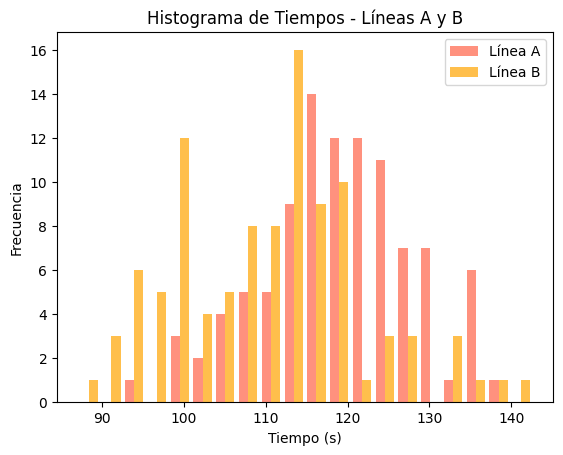

In [31]:
import matplotlib.pyplot as plt 

import numpy as np

fig, ax_hist = plt.subplots()

def create_hist():
    #Creamos el diagrama el historigrama
    ax_hist.hist([dataset_general['Línea A (s)'], dataset_general['Línea B (s)']], #El primer argumento es la lista de los 2
                bins=20, alpha=0.7, label=['Línea A', 'Línea B'],
                color=['tomato', 'orange']) #Aqui lo mismo

    # Etiquetas y texto
    ax_hist.set_xlabel('Tiempo (s)')
    ax_hist.set_ylabel('Frecuencia')
    ax_hist.set_title('Histograma de Tiempos - Líneas A y B')
    ax_hist.legend()
    plt.show()


create_hist()

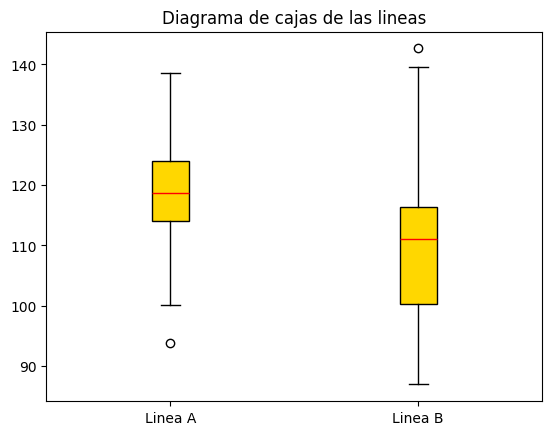

In [32]:
fig, ax_box_plot = plt.subplots()

def create_box_plots():
    #Creamos el boxplot
    ax_box_plot.boxplot([dataset_general['Línea A (s)'], dataset_general['Línea B (s)']],
                        vert=True,
                        tick_labels=['Linea A', 'Linea B'],  #Lista simple ,Usar en vez de labels tick_labels es mas nuevo
                        boxprops=dict(facecolor='gold'),
                        medianprops=dict(color='red'),
                        patch_artist=True)  

    ax_box_plot.set_title('Diagrama de cajas de las lineas')

    plt.show()

create_box_plots()



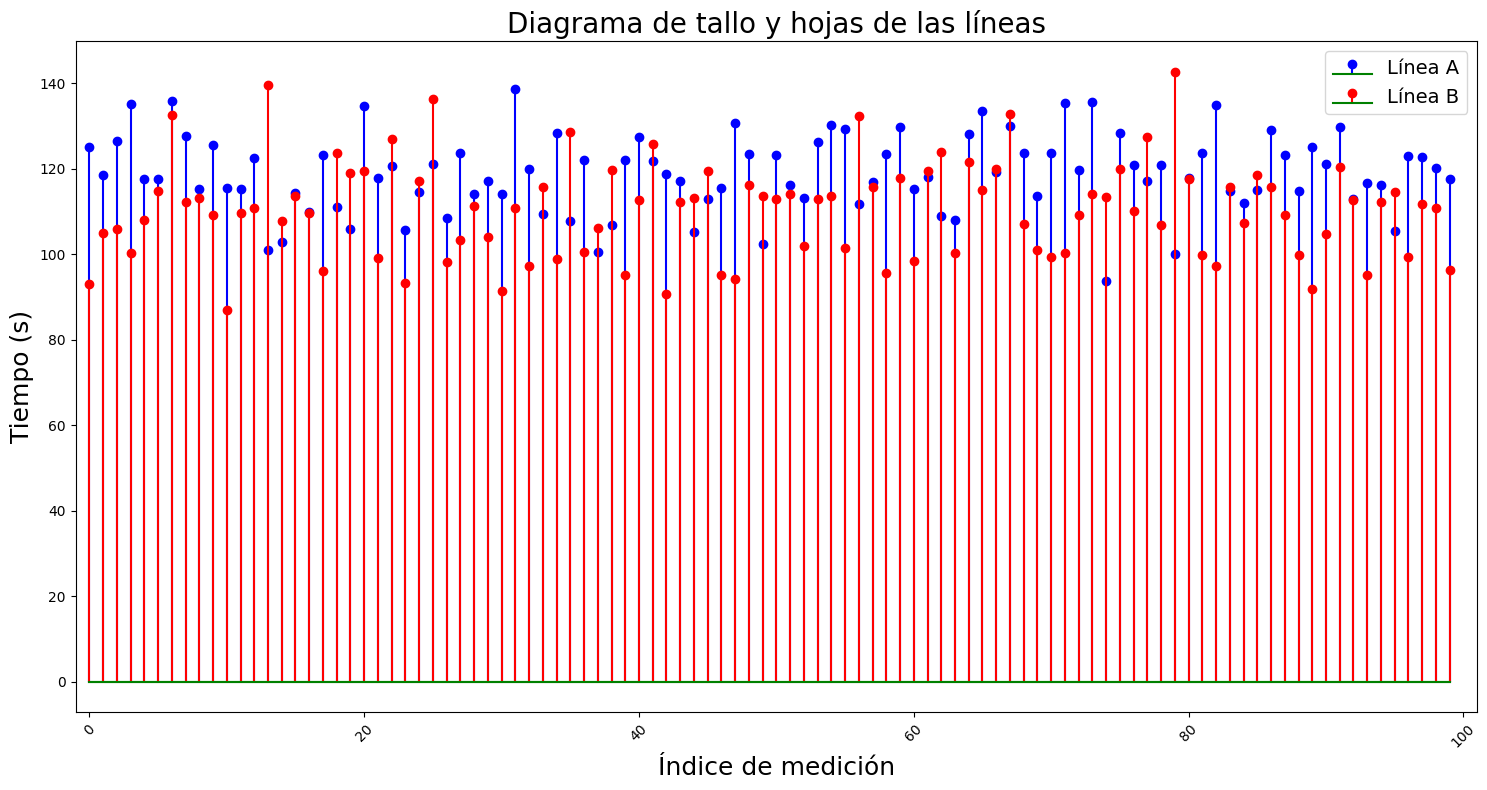

In [33]:
fig, ax_stem = plt.subplots(figsize=(15, 8))

def create_stem():
    
    linea_a = dataset_general['Línea A (s)']
    linea_b = dataset_general['Línea B (s)']
    
    
    # Crear el stem plot para Línea A
    ax_stem.stem(range(len(linea_a)), linea_a, #Siempre es la cantidad de datos y el dato
                linefmt='b-',      # Línea azul
                markerfmt='bo',    # Marcadores azules
                basefmt='g-',      # Línea base verde
                label='Línea A')
    
    # Crear el stem plot para Línea B
    ax_stem.stem(range(len(linea_b)), linea_b,
                linefmt='r-',      # Línea roja
                markerfmt='ro',    # Marcadores rojos
                basefmt='g-',      # Línea base verde
                label='Línea B')
    
    # Personalizar el gráfico
    ax_stem.set_title('Diagrama de tallo y hojas de las líneas', fontsize=20)
    ax_stem.set_xlabel('Índice de medición', fontsize=18)
    ax_stem.set_ylabel('Tiempo (s)', fontsize=18)
    
    ax_stem.set_xlim(-1, len(linea_a) + 1)
    
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    
    ax_stem.legend(fontsize=14)
    
    plt.show()

create_stem()



In [ ]:
# Librerías adicionales
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.1)

# -----------------------------------------------------------
def goodness_of_fit(series, nombre='Serie', alpha=0.05):
    """
    Aplica pruebas KS y Anderson‑Darling para Normal, Exponencial y Weibull.
    Devuelve un dict con los p‑values y la mejor distribución (mayor p).
    """
    resultados = {}
    
    # --- Normal (usando media y desvío muestrales) -------------
    mu, sigma = series.mean(), series.std(ddof=1)
    ks_norm = stats.kstest(series, 'norm', args=(mu, sigma))
    ad_norm = stats.anderson(series, dist='norm')
    resultados['Normal'] = ks_norm.pvalue
    
    # --- Exponencial (loc=0 forzada) ----------------------------
    loc_exp, scale_exp = stats.expon.fit(series, floc=0)
    ks_exp  = stats.kstest(series, 'expon', args=(loc_exp, scale_exp))
    resultados['Exponencial'] = ks_exp.pvalue
    
    # --- Weibull mín -------------------------------------------
    c_w, loc_w, scale_w = stats.weibull_min.fit(series, floc=0)
    ks_weib = stats.kstest(series, 'weibull_min', args=(c_w, loc_w, scale_w))
    resultados['Weibull'] = ks_weib.pvalue
    
    # Mostrar tabla p‑values
    display(pd.DataFrame(resultados, index=[nombre]))
    
    # Seleccionar la mejor (p más alta y > α)
    mejor = max(resultados, key=resultados.get)
    if resultados[mejor] < alpha:
        mejor = 'Ninguna (todas p < α)'
    return mejor, resultados

best_A, _ = goodness_of_fit(dataset_general['Línea A (s)'], 'Línea A')
best_B, _ = goodness_of_fit(dataset_general['Línea B (s)'], 'Línea B')

print(f"\nMejor ajuste Línea A: {best_A}")
print(f"Mejor ajuste Línea B: {best_B}")


,Normal,Exponencial,Weibull
Línea A,0.939568,5.823735e-30,0.375073


,Normal,Exponencial,Weibull
Línea B,0.651338,5.113319e-29,0.26008



Mejor ajuste Línea A: Normal
Mejor ajuste Línea B: Normal


In [ ]:
# Parámetros empíricos
mu_A, sigma_A = dataset_general['Línea A (s)'].mean(), dataset_general['Línea A (s)'].std(ddof=1)
mu_B, sigma_B = dataset_general['Línea B (s)'].mean(), dataset_general['Línea B (s)'].std(ddof=1)

# c‑1) Probabilidad de exceder 120 s
p_A = 1 - stats.norm.cdf(120, loc=mu_A, scale=sigma_A)
p_B = 1 - stats.norm.cdf(120, loc=mu_B, scale=sigma_B)

# c‑2) Tiempo estándar para cumplir 90 %
t90_A = stats.norm.ppf(0.90, loc=mu_A, scale=sigma_A)
t90_B = stats.norm.ppf(0.90, loc=mu_B, scale=sigma_B)

print(f"Línea A →  P(T>120) = {p_A:.2%}   |   t_90 = {t90_A:.2f} s")
print(f"Línea B →  P(T>120) = {p_B:.2%}   |   t_90 = {t90_B:.2f} s")


Línea A →  P(T>120) = 45.45%   |   t_90 = 130.60 s
Línea B →  P(T>120) = 19.75%   |   t_90 = 124.93 s


In [36]:
def ic95_media(series):
    n = len(series)
    mu = series.mean()
    s  = series.std(ddof=1)
    ic = stats.t.interval(0.95, df=n-1, loc=mu, scale=s/np.sqrt(n))
    return ic

ic_A = ic95_media(dataset_general['Línea A (s)'])
ic_B = ic95_media(dataset_general['Línea B (s)'])

print(f"IC 95 % μ_A: {ic_A[0]:.2f} – {ic_A[1]:.2f}")
print(f"IC 95 % μ_B: {ic_B[0]:.2f} – {ic_B[1]:.2f}")


IC 95 % μ_A: 117.16 – 120.76
IC 95 % μ_B: 108.00 – 112.54


In [37]:
t_stat, p_val = stats.ttest_ind(dataset_general['Línea A (s)'],
                                dataset_general['Línea B (s)'],
                                equal_var=False)    # Welch
print(f"t = {t_stat:.3f}   |   p = {p_val:.4f}")


t = 5.951   |   p = 0.0000


### Revisión bibliográfica

**Artículo consultado:**  
*Kerschbaum, M., Dufour, C., & Ng, S. (2018). Identification of Statistical Distributions for Cycle Time in Wafer Fabrication. Proceedings of the Winter Simulation Conference.*

**Similitudes metodológicas**

1. Ambos estudios utilizan histogramas y pruebas KS/AD para seleccionar la distribución que describe los tiempos de ciclo.  
2. Calculan probabilidades de sobre‑cumplimiento de estándares productivos a partir de la distribución ajustada.  
3. Emplean intervalos de confianza para comunicar la incertidumbre en las medias de proceso.

**Diferencias metodológicas**

1. El artículo analiza más de 10 000 observaciones por estación; nuestro trabajo usa 100 mediciones simuladas.  
2. Ellos comparan hasta diez distribuciones (Gamma, Log‑Normal, Beta, etc.); nosotros limitamos el análisis a Normal, Exponencial y Weibull.  
3. Incluyen gráficos de control *X̄‑R* y análisis de autocorrelación; nuestro enfoque se centra en la comparación de líneas y pruebas de medias.

*(Ajusta las referencias al artículo exacto que descargues de la base de datos de la universidad y añade sus DOI/URL).*
